# **P1 Graded Challenge 2** 💎

## 1. INTRODUCTION 👋

*   Nama: Karel Gideon Anugrah Hutajulu
*   Batch: FTDS HCK-004

**Problems:**
Buatlah model Classification menggunakan Logistic Regression dan SVM untuk memprediksi income bracket menggunakan dataset yang sudah kalian simpan.

## 2. IMPORT LIBRARIES 💽

In [80]:
import pandas as pd
import numpy as np

#----------------------------

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("crest")

#----------------------------

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#model
from sklearn.linear_model import LogisticRegression
from sklearn import svm

#evaluasi
from sklearn.metrics import classification_report, confusion_matrix

#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

#save model
import joblib




#----------------------------
#So that I can see all columns when displaying dataframe for the first time.
pd.set_option('max_columns',200)

##3.QUERY SQL

Gunakan dataset ml_datasets dari database bernama census_adult_income.

Buatlah query dengan kriteria sebagai berikut:

1. Pilih HANYA kolom age, workclass, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, dan income_bracket.

2. Kolom diatas hanya digunakan sebagai dataset awal. Silakan lakukan Feature Selection di-notebook setelah dataset dibuat.

3. Pilih semua workclass, kecuali ?.

4. Pilih hours_per_week kurang dari 100.

5. Limit jumlah data menjadi sebanyak nomor batch dikali dengan tahun lahir kalian. ex: Batch 10 dan lahir tahun 1995, 10 x 1995 = 19950.

First i want to check the different types of workclass using `distinct`

```sql
SELECT DISTINCT workclass 
FROM `bigquery-public-data.ml_datasets.census_adult_income` LIMIT 1000
```

Then i add the parameters and limit the data to only `8016` because 

- Batch: 004
- Year of birth: 2004

`2004*4 = 8016`

```sql
SELECT 
census.age,
census.workclass,
census.education,
census.education_num,
census.marital_status,
census.occupation,
census.relationship, 
census.race,
census.sex, 
census.capital_gain, 
census.capital_loss, 
census.hours_per_week, 
census.native_country,
census.income_bracket,

FROM `bigquery-public-data.ml_datasets.census_adult_income`  as census

WHERE census.workclass != ' ?' AND
census.hours_per_week <100

LIMIT 8016
```

## 4. DATA LOADING 💽

In [81]:
df = pd.read_csv('/content/h8dsft_P1G2_Karel_Hutajulu.csv')

In [82]:
#Display top 10 rows of dataframe df
df.head(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,77,Private,9th,5,Married-civ-spouse,Priv-house-serv,Wife,Black,Female,0,0,10,United-States,<=50K
2,38,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,24,Haiti,<=50K
3,28,Private,9th,5,Married-civ-spouse,Protective-serv,Wife,Black,Female,0,0,40,United-States,<=50K
4,37,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,Black,Female,0,0,48,United-States,<=50K
5,45,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
6,55,Private,9th,5,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States,<=50K
7,27,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,37,Portugal,<=50K
8,31,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
9,30,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,Portugal,<=50K


In [83]:
#Display top 10 rows of dataframe df
df.tail(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
8006,40,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1672,40,United-States,<=50K
8007,37,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
8008,33,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
8009,28,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
8010,30,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
8011,62,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1740,40,United-States,<=50K
8012,33,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
8013,26,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
8014,55,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K
8015,80,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,1409,0,40,United-States,<=50K


In [84]:
#Check the different datatypes
df.dtypes

age                int64
workclass         object
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income_bracket    object
dtype: object

In [85]:
df.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,8016.000000,8016.000000,8016.000000,8016.000000,8016.000000
mean,40.302270,7.423403,634.790419,76.327470,40.129990
std,14.222537,2.013769,5257.119652,375.924613,12.419646
min,17.000000,2.000000,0.000000,0.000000,1.000000
25%,29.000000,6.000000,0.000000,0.000000,40.000000
50%,39.000000,9.000000,0.000000,0.000000,40.000000
75%,51.000000,9.000000,0.000000,0.000000,43.000000
max,90.000000,9.000000,99999.000000,3900.000000,99.000000


In [86]:
#Check the size of our dataframe using `shape`
original_shape = df.shape
original_shape

(8016, 14)

## 5. EXPLORATORY DATA ANALYSIS (EDA) 🎁

### A. Simple Data Understanding

In [87]:
# Extract the column names using the .columns method
column_names = df.columns

# Print the column names
print(column_names)

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income_bracket'],
      dtype='object')


What is capital_gain/loss?

In the context of an adult census, capital loss and gain refer to the financial gains or losses resulting from the sale of assets such as stocks, bonds, and real estate. These values are included as features in the census dataset to provide insight into an individual's financial situation and potential income level.

In [88]:
category_col = df.select_dtypes(include=['object','category']).columns.tolist()
for column in df[category_col]:
    print(f'{column} : {df[column].unique()}')
    print()

workclass : [' Private' ' Local-gov' ' Self-emp-inc' ' Federal-gov' ' State-gov'
 ' Self-emp-not-inc' ' Never-worked' ' Without-pay']

education : [' 9th' ' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th'
 ' HS-grad']

marital_status : [' Married-civ-spouse' ' Never-married' ' Divorced' ' Separated'
 ' Married-spouse-absent' ' Widowed' ' Married-AF-spouse']

occupation : [' Other-service' ' Priv-house-serv' ' Protective-serv'
 ' Machine-op-inspct' ' Tech-support' ' Exec-managerial'
 ' Farming-fishing' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Handlers-cleaners' ' Prof-specialty' ' ?'
 ' Armed-Forces']

relationship : [' Wife' ' Husband' ' Own-child' ' Unmarried' ' Not-in-family'
 ' Other-relative']

race : [' Black' ' White' ' Asian-Pac-Islander' ' Other' ' Amer-Indian-Eskimo']

sex : [' Female' ' Male']

native_country : [' United-States' ' Haiti' ' Portugal' ' Yugoslavia' ' Dominican-Republic'
 ' ?' ' Trinadad&Tobago' ' Mexico' ' Guatemala' ' Puerto-Rico'

there are spaces before every data, to make it easier and cleaner for us in the next steps i will remove the space with `strip`.

In [89]:
categorical_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income_bracket']

for col in categorical_cols:
    df[col] = df[col].str.strip()


### Dealing with high cardinality data 

native_country has alot of columns we will group the values `countruies` based on the `continents` using a dictionary

In [90]:
continent_map = {
    'United-States': 'North America',
    'Haiti': 'North America',
    'Portugal': 'Europe',
    'Yugoslavia': 'Europe',
    'Dominican-Republic': 'North America',
    'Trinadad&Tobago': 'North America',
    'Mexico': 'North America',
    'Guatemala': 'North America',
    'Puerto-Rico': 'North America',
    'Canada': 'North America',
    'Poland': 'Europe',
    'Outlying-US(Guam-USVI-etc)': 'North America',
    'India': 'Asia',
    'El-Salvador': 'North America',
    'Nicaragua': 'North America',
    'Philippines': 'Asia',
    'Cuba': 'North America',
    'Columbia': 'South America',
    'Vietnam': 'Asia',
    'Jamaica': 'North America',
    'Ireland': 'Europe',
    'China': 'Asia',
    'Japan': 'Asia',
    'Italy': 'Europe',
    'Peru': 'South America',
    'England': 'Europe',
    'Ecuador': 'South America',
    'Greece': 'Europe',
    'Germany': 'Europe',
    'Hong': 'Asia',
    'Scotland': 'Europe',
    'South': 'Asia',
    'Honduras': 'North America',
    'Cambodia': 'Asia',
    'Thailand': 'Asia',
    'Laos': 'Asia',
    'Hungary': 'Europe',
    'Iran': 'Asia',
    'Taiwan': 'Asia',
    'France': 'Europe'
}

df['continent'] = df['native_country'].map(continent_map)
df = df[df['native_country'] != '?']


In [91]:
df.head(3)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket,continent
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K,North America
1,77,Private,9th,5,Married-civ-spouse,Priv-house-serv,Wife,Black,Female,0,0,10,United-States,<=50K,North America
2,38,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,24,Haiti,<=50K,North America


In [92]:
df.shape

(7895, 15)

### Removing unused Columns

Immedeatly I will be removing the following columns that I wont be using in this notebook:

- marital_status: we will only be using column relationship
- native_country: we use the continent to reduce cardinality

In [93]:
df = df.drop(['marital_status','native_country'], axis=1)

### B. Visualisizing the dataset

<AxesSubplot:xlabel='sex', ylabel='count'>

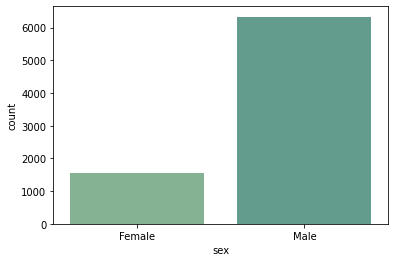

In [94]:
sns.countplot(x='sex', data=df)

**Observation:**

There is a bigger proportion of male data compared to female data

### Distribution of Numerical Columns

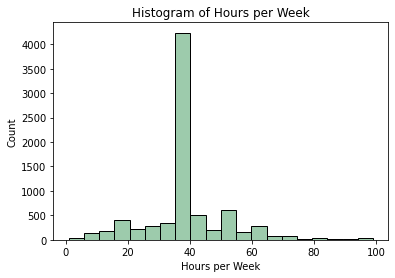


Skewness Value :  0.40575695276805307


In [96]:

sns.histplot(df['hours_per_week'], bins=20)
plt.title('Histogram of Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Count')
plt.show()
print('\nSkewness Value : ', df['hours_per_week'].skew())

<AxesSubplot:xlabel='income_bracket', ylabel='age'>

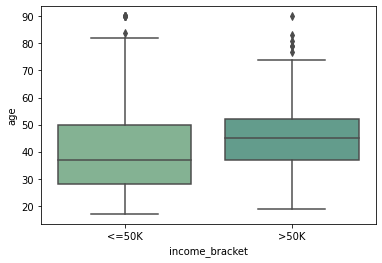

In [95]:
sns.boxplot(x='income_bracket',y='age',data=df)

Most of the higher income people`>50k` are older than the lower income people `<=50k`

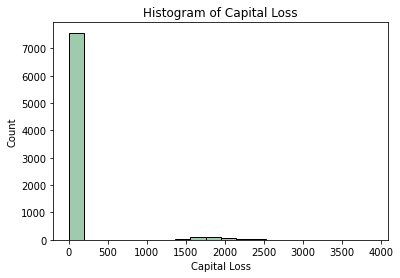


Skewness Value :  4.890818683688921


In [97]:
sns.histplot(df['capital_loss'], bins=20)
plt.title('Histogram of Capital Loss')
plt.xlabel('Capital Loss')
plt.ylabel('Count')
plt.show()
print('\nSkewness Value : ', df['capital_loss'].skew())

In [98]:
df.groupby(['sex','income_bracket'])[['capital_loss']].mean().round(2)

capital_loss
sex    income_bracket              
Female <=50K                  38.61
       >50K                  114.59
Male   <=50K                  56.40
       >50K                  172.41

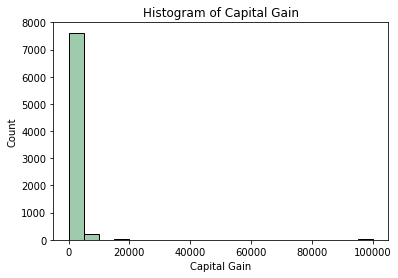


Skewness Value :  17.284481247026093


In [99]:
sns.histplot(df['capital_gain'], bins=20)
plt.title('Histogram of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Count')
plt.show()
print('\nSkewness Value : ', df['capital_gain'].skew())

In [100]:
df.groupby(['sex','income_bracket'])[['capital_gain']].mean().round(2)

capital_gain
sex    income_bracket              
Female <=50K                 127.94
       >50K                 2612.86
Male   <=50K                 162.33
       >50K                 2378.23

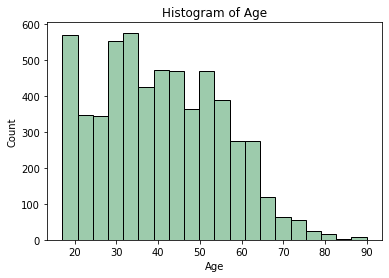


Skewness Value :  0.2866448391871135


In [148]:
sns.histplot(df['age'], bins=20)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
print('\nSkewness Value : ', df['age'].skew())

**Objective:**

- We can see that age is slightly right-skewed, which means that the majority of individuals are clustered towards the lower age range, with a few individuals who are older. 
- Capital gain and capital loss data have a majority of individuals with low values and a few with very high values. Reasonalbe because, only a small proportion of investors tend to achieve very high gains or losses, while most investors achieve more modest returns.
- Hours of work per week is also slightly right-skewed, which means that most individuals work around the average number of hours per week, with a smaller number of individuals working much longer hours

both capital gain and loss have outliers which we will remove in the next section

### Bargraph of Occupation and Workclass Columns

In [102]:
# define the function to create the subplot
def create_subplot(ax, x_col, title):
    sns.countplot(x=x_col, data=df, ax=ax)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(x_col.capitalize(), fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    sns.despine(ax=ax)
    #Slanted label used becuase of the long destination and source categorie names.
    ax.tick_params(axis='x', labelrotation=-45)
# create the subplots

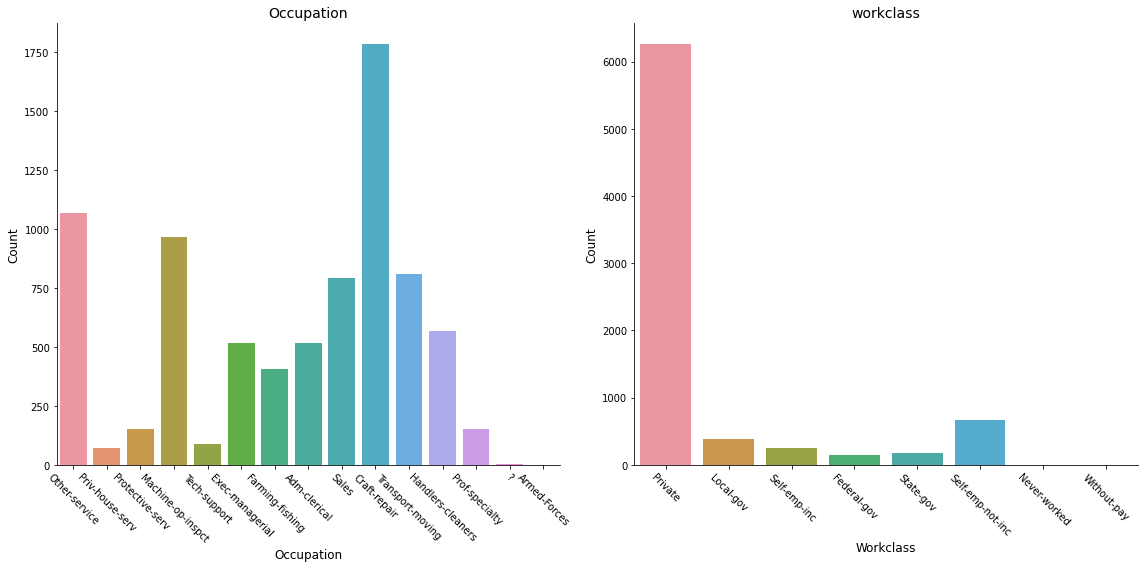

In [103]:

# create the subplots
fig, axes = plt.subplots(ncols=2, figsize=(16, 8))

create_subplot(axes[0], 'occupation', 'Occupation')
create_subplot(axes[1], 'workclass', 'workclass')

# adjust the layout and display the plots
plt.tight_layout()
plt.show()

In [104]:
counts=df['occupation'].value_counts()
percent=(df['occupation'].value_counts(normalize=True) * 100).round(2)
group_smoker= pd.DataFrame({'counts': counts, 'percentage %': percent})
group_smoker.index = group_smoker.index.set_names(['occupation'])
group_smoker

,counts,percentage %
occupation,,
Craft-repair,1781,22.56
Other-service,1067,13.51
Machine-op-inspct,965,12.22
Transport-moving,809,10.25
Sales,791,10.02
Handlers-cleaners,569,7.21
Adm-clerical,518,6.56
Exec-managerial,515,6.52
Farming-fishing,408,5.17


In [105]:
df.groupby(['occupation', 'income_bracket']).size()

occupation         income_bracket
?                  <=50K                5
Adm-clerical       <=50K              370
                   >50K               148
Armed-Forces       <=50K                1
Craft-repair       <=50K             1361
                   >50K               420
Exec-managerial    <=50K              265
                   >50K               250
Farming-fishing    <=50K              358
                   >50K                50
Handlers-cleaners  <=50K              518
                   >50K                51
Machine-op-inspct  <=50K              810
                   >50K               155
Other-service      <=50K             1012
                   >50K                55
Priv-house-serv    <=50K               72
Prof-specialty     <=50K               99
                   >50K                54
Protective-serv    <=50K              109
                   >50K                42
Sales              <=50K              593
                   >50K               198


**Observation:** 

The data shows the number of individuals in different occupational categories and their corresponding income brackets. The largest occupational category is "craft-repair," with 1361 individuals earning less than or equal to $50K per year and 420 individuals earning more than $50K per year. 

The next largest category is "other-service," with 1012 individuals earning less than or equal to $50K per year and 55 individuals earning more than $50K per year. The smallest category is "armed-forces," with only 1 individual earning less than or equal to $50K per year. There are also a substantial number of individuals in the "sales" and "transport-moving" categories earning both less than or equal to $50K per year and more than $50K per year.

The occupation labeled "?" represents missing data for that category.

In [106]:
counts=df['workclass'].value_counts()
percent=(df['workclass'].value_counts(normalize=True) * 100).round(2)
group_smoker= pd.DataFrame({'counts': counts, 'percentage %': percent})
group_smoker.index = group_smoker.index.set_names(['workclass'])
group_smoker

,counts,percentage %
workclass,,
Private,6255,79.23
Self-emp-not-inc,665,8.42
Local-gov,387,4.90
Self-emp-inc,253,3.20
State-gov,182,2.31
Federal-gov,143,1.81
Never-worked,5,0.06
Without-pay,5,0.06


In [107]:
df.groupby(['workclass', 'income_bracket']).size()

workclass         income_bracket
Federal-gov       <=50K               70
                  >50K                73
Local-gov         <=50K              299
                  >50K                88
Never-worked      <=50K                5
Private           <=50K             5108
                  >50K              1147
Self-emp-inc      <=50K              137
                  >50K               116
Self-emp-not-inc  <=50K              479
                  >50K               186
State-gov         <=50K              137
                  >50K                45
Without-pay       <=50K                5
dtype: int64

**Observation:** 

The majority of individuals work in the private sector, with 5108 individuals earning less than or equal to $50K per year and 1147 individuals earning more than $50K per year. 

The next largest group is in the local government sector, with 299 individuals earning less than or equal to $50K per year and 88 individuals earning more than $50K per year. 

The federal government and self-employed individuals also have a substantial number of individuals earning both less than or equal to $50K per year and more than $50K per year. There are also smaller numbers of individuals in the self-employed not incorporated, state government, never worked, and without pay categories.

### Bargraph of Education Columns

In [108]:
counts=df['education'].value_counts()
percent=(df['education'].value_counts(normalize=True) * 100).round(2)
group_smoker= pd.DataFrame({'counts': counts, 'percentage %': percent})
group_smoker.index = group_smoker.index.set_names(['education'])
group_smoker

,counts,percentage %
education,,
HS-grad,4195,53.13
11th,1049,13.29
10th,822,10.41
7th-8th,558,7.07
9th,455,5.76
12th,377,4.78
5th-6th,288,3.65
1st-4th,151,1.91


**Observation:** 

The data represents the educational attainment of a certain population, with the highest proportion having completed high school (53.13%), followed by 11th grade (13.29%) and 10th grade (10.41%). A smaller proportion had completed 7th-8th grade (7.07%), 9th grade (5.76%), 12th grade (4.78%), 5th-6th grade (3.65%), and 1st-4th grade (1.91%).

### Bargraph of relationship, continent and race columns

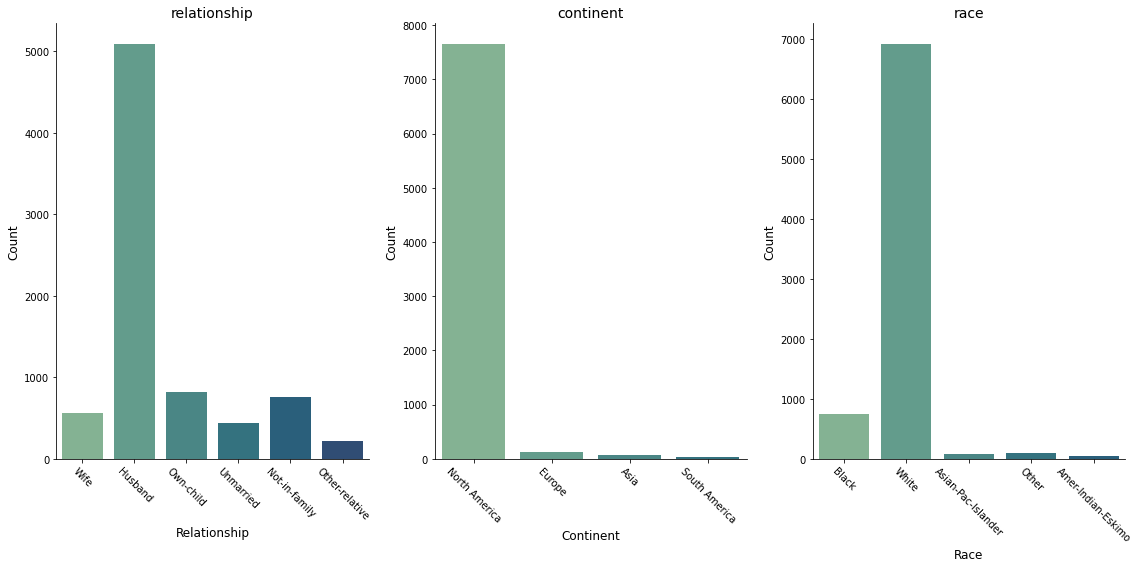

In [109]:
# create the subplots
fig, axes = plt.subplots(ncols=3, figsize=(16, 8))


create_subplot(axes[0], 'relationship', 'relationship')
create_subplot(axes[1], 'continent', 'continent')
create_subplot(axes[2], 'race', 'race')


# adjust the layout and display the plots
plt.tight_layout()
plt.show()

**Observation:** 

Each column has a dominant category, most data comes from the North America and reasonably with a white race which are mostly Male and married (Husband)

### Relationship Observation between numerical data

<AxesSubplot:>

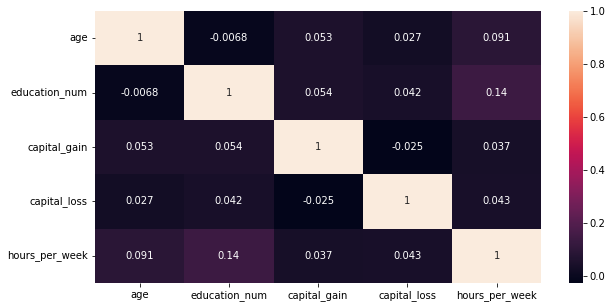

In [110]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

**Observation:** 

The strongest relationship is between `education_num` and `hours_per_week`. People who spend more time on their studies tend to work longer hours. Age also has a relationship with capital_gain. The higher the age the higher the capital_gain.

### Relationship Analysis between categorical data

In [111]:
from scipy.stats import chi2_contingency

# Define the columns to compare with the target variable
columns = ['age', 'workclass', 'education',  'occupation', 'relationship', 'race', 'sex', 'continent']

# Loop through the columns and calculate the chi-square test of independence
for col in columns:
    contingency_table = pd.crosstab(df[col], df['income_bracket'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-squared test of independence between '{col}' and 'income_bracket': p-value = {p_value}")

Chi-squared test of independence between 'age' and 'income_bracket': p-value = 8.661341477359719e-94
Chi-squared test of independence between 'workclass' and 'income_bracket': p-value = 1.265985565402289e-44
Chi-squared test of independence between 'education' and 'income_bracket': p-value = 3.192630139236747e-197
Chi-squared test of independence between 'occupation' and 'income_bracket': p-value = 1.5775256083802743e-115
Chi-squared test of independence between 'relationship' and 'income_bracket': p-value = 4.9717707784078574e-147
Chi-squared test of independence between 'race' and 'income_bracket': p-value = 1.6060674269960443e-12
Chi-squared test of independence between 'sex' and 'income_bracket': p-value = 2.0210914399107682e-24
Chi-squared test of independence between 'continent' and 'income_bracket': p-value = 0.036272502090953285


**Observation:** 

Based on the results of the Chi-squared test of independence, it appears that all of the features have a statistically significant relationship with the target variable, income_bracket. The p-values for each test are very small, indicating that there is a low probability that the observed relationship between the features and the target variable is due to chance.

## 5. Data Pre-processing 🐠

### A. Dealing with duplicates


In [112]:
df.duplicated().sum()

1193

In [113]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### B. Dealing with Missing values


In [114]:
df.isna().sum() 

age               0
workclass         0
education         0
education_num     0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
income_bracket    0
continent         0
dtype: int64

In [115]:
# calculate the percentage of empty rows in the DataFrame
empty_rows = df.isna().sum().sum()
total_rows = df.shape[0]
percent_empty_rows = (empty_rows / total_rows) * 100

print(f"Percentage of data with empty rows: {percent_empty_rows:.2f}%")

Percentage of data with empty rows: 0.00%


There are no missing values that is why there is no MAR, MCAR,MNAR analysis

### C. Dealing with Outliers

In [116]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=20)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

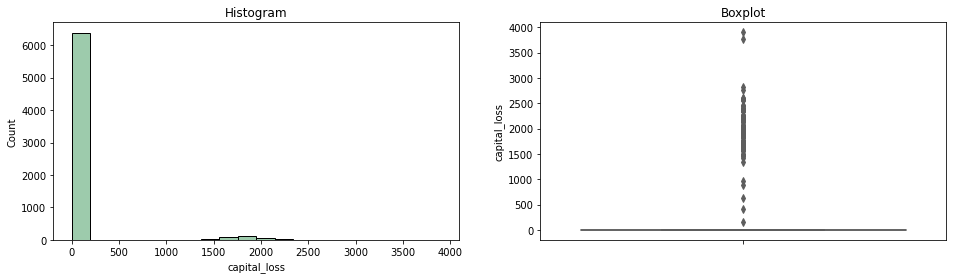


Skewness Value :  4.48255510242773


In [117]:
diagnostic_plots(df, 'capital_loss')
print('\nSkewness Value : ', df['capital_loss'].skew())

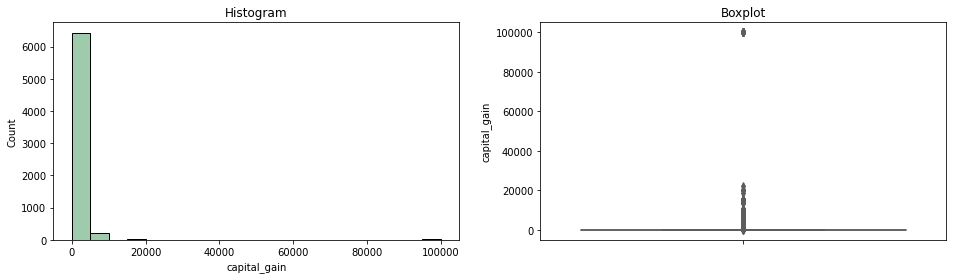


Skewness Value :  15.928781589887029


In [118]:
diagnostic_plots(df, 'capital_gain')
print('\nSkewness Value : ', df['capital_gain'].skew())

We will use `Tukey method` to remove outlier because the data is `highly skewed`.

In [119]:
# Calculate the lower and upper quartiles for capital_loss and capital_gain
q1_loss = df['capital_loss'].quantile(0.25)
q3_loss = df['capital_loss'].quantile(0.75)
iqr_loss = q3_loss - q1_loss

q1_gain = df['capital_gain'].quantile(0.25)
q3_gain = df['capital_gain'].quantile(0.75)
iqr_gain = q3_gain - q1_gain

# Identify the values that fall outside the IQR for capital_loss and capital_gain
outliers = df[(df['capital_loss'] < q1_loss - 1.5*iqr_loss) | (df['capital_loss'] > q3_loss + 1.5*iqr_loss) |
              (df['capital_gain'] < q1_gain - 1.5*iqr_gain) | (df['capital_gain'] > q3_gain + 1.5*iqr_gain)]
outliers.head(2)

,age,workclass,education,education_num,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income_bracket,continent
0,39,Private,9th,5,Other-service,Wife,Black,Female,3411,0,34,<=50K,North America
12,70,Private,9th,5,Machine-op-inspct,Wife,White,Female,2653,0,40,<=50K,North America


In [120]:
# Drop the rows containing outlier values for both capital_loss and capital_gain
df = df.drop(outliers.index)

## 6. Feature Engineering 🔧

### A. Feature Selection and VIF test for Multicolinearity

Note: We have removed the columns we dont need in eda and added one column named `continent` now we are ready for splitting data

In [121]:
# Extract the column names using the .columns method
column_names = df.columns

# Print the column names
print(column_names)

Index(['age', 'workclass', 'education', 'education_num', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income_bracket', 'continent'],
      dtype='object')


VIF TEST

In [122]:
vif_df = pd.DataFrame()

In [123]:
# Calculating VIF (Multicollinearity)
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values(by=['VIF'],ascending=False)
    return(vif)

In [124]:
vif = df.iloc[:,[0,3]]
calc_vif(vif)

,variables,VIF
0,age,5.371971
1,education_num,5.371971


**My Analysis:**
A VIF value of 5.37 suggests that there may be some moderate multicollinearity between the "age" and "education_num" variables in your dataset, but it is not severe enough to cause concern. 

It is generally recommended to keep VIF values below 10. 

Source: https://www.statisticshowto.com/variance-inflation-factor/ 

### B. Splitting Data


**Split dataset to X and Y variables**


In [125]:
#split Fitur dan target
x= df.drop('income_bracket', axis=1)
y= df['income_bracket']


**Perform 80/20 Data split**

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

**Data Dimension**

In [127]:
x_train.shape, y_train.shape

((4649, 12), (4649,))

In [128]:
x_test.shape, y_test.shape

((1163, 12), (1163,))

### C. Encoding with (OHE) ☕


I will be using `one hot encoding` method because the categories in the data does not have any 'order' or 'magnitude'. One hot encoding avoids this issue by encoding each category as a separate binary feature

In [129]:
# Create an instance of OneHotEncoder with the handle_unknown parameter set to 'ignore'
encoder = OneHotEncoder(handle_unknown='ignore', sparse=True)

# Perform one-hot encoding on the categorical columns
one_hot_encoded = encoder.fit_transform(df[['workclass', 'education', 'occupation', 'relationship', 'race', 'sex', 'continent']])

# One-hot encode the categorical variables in the training set
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
one_hot_encoded_train = encoder.fit_transform(x_train[['workclass', 'education', 'occupation', 'relationship', 'race', 'sex', 'continent']])
feature_names = encoder.get_feature_names_out(['workclass', 'education', 'occupation', 'relationship', 'race', 'sex', 'continent'])
encoded_df_train = pd.DataFrame.sparse.from_spmatrix(one_hot_encoded_train, columns=feature_names)

# One-hot encode the categorical variables in the testing set using the same encoder and feature names as the training set
one_hot_encoded_test = encoder.transform(x_test[['workclass', 'education', 'occupation', 'relationship', 'race', 'sex', 'continent']])
encoded_df_test = pd.DataFrame.sparse.from_spmatrix(one_hot_encoded_test, columns=feature_names)

# Combine the encoded training and testing sets with their respective original dataframes
X_train_encoded = pd.concat([x_train.reset_index(drop=True), encoded_df_train], axis=1)
X_test_encoded = pd.concat([x_test.reset_index(drop=True), encoded_df_test], axis=1)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Dropping the original collumns that will not be used in modelling

In [130]:
# Drop the original categorical features from the encoded training dataframe
X_train_encoded = X_train_encoded.drop(['workclass', 'education', 'occupation', 'relationship', 'race', 'sex', 'continent'], axis=1)

# Drop the original categorical features from the encoded testing dataframe
X_test_encoded = X_test_encoded.drop(['workclass', 'education', 'occupation', 'relationship', 'race', 'sex', 'continent'], axis=1)


Displaying the result of the encoding with `head`

In [131]:
X_train_encoded.head(3)

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_HS-grad,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,continent_Asia,continent_Europe,continent_North America,continent_South America
0,26,9,0,0,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,29,8,0,0,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,46,4,0,0,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


###D. Scaling with Standard Scaler ⚖


First I will plot a histogram of all the numerical columns and calculate the skew to figure out the best scaling method to use.

age skewness: 0.29
capital_gain skewness: 0.00
capital_loss skewness: 0.00
hours_per_week skewness: 0.41
education_num skewness: -0.79


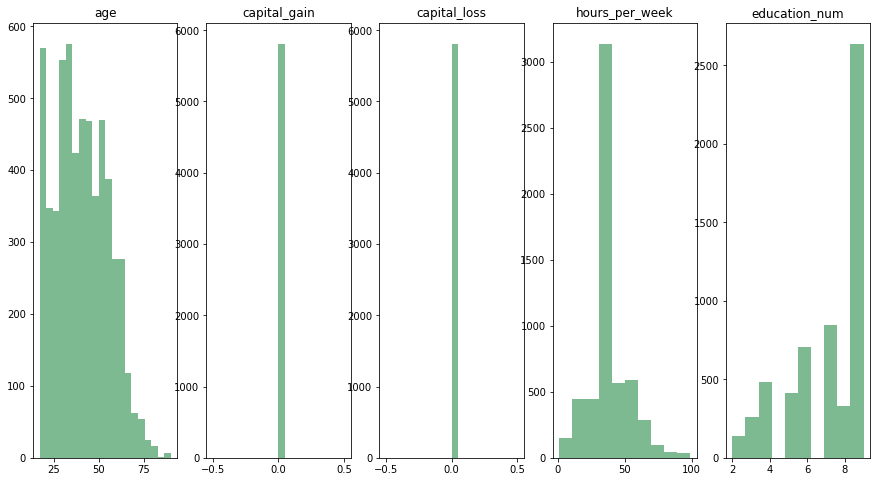

In [132]:
# Create histograms for the distance and surge_multiplier features
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))

axes[0].hist(df['age'], bins=20)
axes[0].set_title('age')

axes[1].hist(df['capital_gain'], bins=20)
axes[1].set_title('capital_gain')

axes[2].hist(df['capital_loss'], bins=20)
axes[2].set_title('capital_loss')

axes[3].hist(df['hours_per_week'], bins=10)
axes[3].set_title('hours_per_week')

axes[4].hist(df['education_num'], bins=10)
axes[4].set_title('education_num')


# Calculate the skewness of the distance and surge_multiplier features
age_skew = df['age'].skew()
capital_gain_skew = df['capital_gain'].skew()
capital_loss_skew = df['capital_loss'].skew()
hours_per_week_skew = df['hours_per_week'].skew()
education_num_skew = df['education_num'].skew()

print(f"age skewness: {age_skew:.2f}")
print(f"capital_gain skewness: {capital_gain_skew:.2f}")
print(f"capital_loss skewness: {capital_loss_skew:.2f}")
print(f"hours_per_week skewness: {hours_per_week_skew:.2f}")
print(f"education_num skewness: {education_num_skew:.2f}")

plt.show()

The reason I use `standard scaler` instead of min-max scaler is that standard scaler is more suitable for data that follows a `normal or near-normal distribution`. Skew is <1 and >1 meaning normal distribution

In [133]:
# Create a StandardScaler object for age column
age_scaler = StandardScaler()
X_train_age_scaled = age_scaler.fit_transform(x_train[['age']])
X_test_age_scaled = age_scaler.transform(x_test[['age']])

# Create a StandardScaler object for capital_gain column
capital_gain_scaler = StandardScaler()
X_train_capital_gain_scaled = capital_gain_scaler.fit_transform(x_train[['capital_gain']])
X_test_capital_gain_scaled = capital_gain_scaler.transform(x_test[['capital_gain']])

# Create a StandardScaler object for capital_loss column
capital_loss_scaler = StandardScaler()
X_train_capital_loss_scaled = capital_loss_scaler.fit_transform(x_train[['capital_loss']])
X_test_capital_loss_scaled = capital_loss_scaler.transform(x_test[['capital_loss']])

# Create a StandardScaler object for hours_per_week column
hours_per_week_scaler = StandardScaler()
X_train_hours_per_week_scaled = hours_per_week_scaler.fit_transform(x_train[['hours_per_week']])
X_test_hours_per_week_scaled = hours_per_week_scaler.transform(x_test[['hours_per_week']])


# Create a StandardScaler object for education_num column
education_num_scaler = StandardScaler()
X_train_education_num_scaled = education_num_scaler.fit_transform(x_train[['education_num']])
X_test_education_num_scaled = education_num_scaler.transform(x_test[['education_num']])

# Combine the scaled features
X_train_combined = np.concatenate([X_train_age_scaled, X_train_capital_gain_scaled, X_train_capital_loss_scaled, X_train_hours_per_week_scaled, X_train_education_num_scaled], axis=1)
X_test_combined = np.concatenate([X_test_age_scaled, X_test_capital_gain_scaled, X_test_capital_loss_scaled, X_test_hours_per_week_scaled,X_test_education_num_scaled], axis=1)

# Display the scaled features
print('X_train_combined:\n', X_train_combined)
print('X_test_combined:\n', X_test_combined)


X_train_combined:
 [[-0.99505804  0.          0.         -0.01035813  0.88498578]
 [-0.78933503  0.          0.         -0.01035813  0.40231346]
 [ 0.37642872  0.          0.         -0.01035813 -1.52837584]
 ...
 [ 0.10213137  0.          0.         -0.01035813  0.88498578]
 [ 0.65072607  0.          0.          0.74798732 -0.56303119]
 [ 1.47361812  0.          0.         -0.01035813 -1.52837584]]
X_test_combined:
 [[-0.78933503  0.          0.         -0.01035813  0.88498578]
 [ 1.67934114  0.          0.          0.3688146  -1.04570352]
 [ 2.1593615   0.          0.         -0.38953085 -0.08035887]
 ...
 [-1.06363238  0.          0.         -0.01035813 -0.08035887]
 [ 0.85644908  0.          0.         -0.01035813 -0.08035887]
 [-1.47507841  0.          0.          1.50633278 -1.52837584]]


In [134]:
X_train_combined

array([[-0.99505804,  0.        ,  0.        , -0.01035813,  0.88498578],
       [-0.78933503,  0.        ,  0.        , -0.01035813,  0.40231346],
       [ 0.37642872,  0.        ,  0.        , -0.01035813, -1.52837584],
       ...,
       [ 0.10213137,  0.        ,  0.        , -0.01035813,  0.88498578],
       [ 0.65072607,  0.        ,  0.        ,  0.74798732, -0.56303119],
       [ 1.47361812,  0.        ,  0.        , -0.01035813, -1.52837584]])

Concatenate the scaling result with the encoding result

In [135]:
# Concatenate the encoded features and the scaled features for the training set
X_train = pd.concat([X_train_encoded.reset_index(drop=True), pd.DataFrame(X_train_combined, columns=['age1', 'capital_gain1', 'capital_loss1', 'hours_per_week1','education_num1'])], axis=1)

# Concatenate the encoded features and the scaled features for the testing set
X_test = pd.concat([X_test_encoded.reset_index(drop=True), pd.DataFrame(X_test_combined, columns=['age1', 'capital_gain1', 'capital_loss1', 'hours_per_week1','education_num1'])], axis=1)

# Drop the original unscaled columns from the training and testing sets
X_train = X_train.drop(['age', 'capital_gain', 'capital_loss', 'hours_per_week','education_num'], axis=1)
X_test = X_test.drop(['age', 'capital_gain', 'capital_loss', 'hours_per_week','education_num'], axis=1)


display the final `train` data with the encoded and scaled values

In [136]:
X_train

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_HS-grad,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,continent_Asia,continent_Europe,continent_North America,continent_South America,age1,capital_gain1,capital_loss1,hours_per_week1,education_num1
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.995058,0.0,0.0,-0.010358,0.884986
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.789335,0.0,0.0,-0.010358,0.402313
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.376429,0.0,0.0,-0.010358,-1.528376
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.679341,0.0,0.0,-0.010358,0.884986
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.583612,0.0,0.0,-1.299545,-1.045704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4644,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.199321,0.0,0.0,-0.010358,-2.493720
4645,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.612227,0.0,0.0,-1.147876,-0.563031
4646,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.102131,0.0,0.0,-0.010358,0.884986
4647,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.650726,0.0,0.0,0.747987,-0.563031


##7. Model Definition 🔖

**Logistic Regression Model Definition:**

- The logistic regression model is a type of supervised learning algorithm that can be used to predict a binary outcome (e.g., whether an individual's income is greater or less than $50k) based on a set of predictor variables (e.g., age, education, occupation, etc.).
- The logistic regression model estimates the probability of the binary outcome using a logistic function, which maps any input value to a value between 0 and 1.
- The logistic regression model uses a cost function (e.g., cross-entropy loss) to minimize the difference between the predicted probabilities and the true binary outcomes in the training data.
- The logistic regression model can be trained using batch gradient descent or other optimization algorithms, and the trained model can be used to make predictions on new data.




**SVM Model Definition:**

- The SVM model is a type of supervised learning algorithm that can be used for both classification and regression tasks.
- The SVM model finds the hyperplane (i.e., decision boundary) that maximally separates the data points of different classes in the feature space.
- The SVM model can be trained using different kernel functions (e.g., linear, polynomial, radial basis function), which transform the input data into a higher-dimensional space, where the classes can be better separated.
- The SVM model uses a cost function (e.g., hinge loss) to penalize misclassifications and find the hyperplane that maximizes the margin (i.e., the distance between the hyperplane and the closest data points of each class).
- The SVM model can be trained using different optimization algorithms (e.g., quadratic programming, gradient descent), and the trained model can be used to make predictions on new data.


- In summary, both the logistic regression and SVM models are powerful supervised learning algorithms that can be used for binary classification tasks. The logistic regression model estimates the probability of the binary outcome using a logistic function, while the SVM model finds the hyperplane that maximally separates the data points of different classes in the feature space.

Logistic Regression:

Sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Logistic Regression Tutorial: https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc


---




SVM:

Sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

SVM Tutorial: https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

##8 & 9. Model Training and Evaluation 🚅

###A. Logistic Regression 

In [137]:
logreg_model = LogisticRegression(C=0.1,max_iter = 500)
logreg_model.fit(X_train,y_train)

y_pred_train = logreg_model.predict(X_train)
y_pred_test = logreg_model.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [138]:
# y = B + W*x1...

print(f'Weight Coefficient : {logreg_model.coef_}')
print(f'Bias : {logreg_model.intercept_}')

Weight Coefficient : [[ 0.38182776 -0.14304572 -0.02485021 -0.17420528  0.03808671 -0.00147578
  -0.01292843 -0.06378585 -0.13486593 -0.41688287 -0.08028593  0.135377
  -0.08440558 -0.01275278 -0.03245154  0.62589083 -0.02485021  0.20579272
  -0.01661137  0.1692906   0.45999204 -0.79476341 -0.18717047  0.01119771
  -0.65619548 -0.16905012  0.35412928 -0.01006808  0.21495746  0.36050967
   0.08246287  0.44898791 -0.40236396 -0.32692553 -0.36620016 -0.21131807
   0.85744301  0.03395364  0.1374581  -0.10490977 -0.2685092   0.20163042
  -0.13859685  0.13822005  0.11536273  0.14257808 -0.01344156 -0.24487605
   0.37256406  0.          0.          0.38758386  0.51661535]]
Bias : [-2.70735846]


In [139]:
print(f'Test accuracy: {logreg_model.score(X_test,y_test)}')
print(f'Train accuracy: {logreg_model.score(X_train,y_train)}')

Test accuracy: 0.8245915735167669
Train accuracy: 0.8242632824263283


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [140]:
print("============ Training Set Metrics:============ ")
print(classification_report(y_train, y_pred_train))

print('\n')

print(" ============ Test Set Metrics: ===========")
print(classification_report(y_test, y_pred_test))

============ Training Set Metrics:============ 
              precision    recall  f1-score   support

       <=50K       0.84      0.98      0.90      3832
        >50K       0.50      0.11      0.18       817

    accuracy                           0.82      4649
   macro avg       0.67      0.54      0.54      4649
weighted avg       0.78      0.82      0.77      4649



 ============ Test Set Metrics: ===========
              precision    recall  f1-score   support

       <=50K       0.83      0.98      0.90       949
        >50K       0.61      0.13      0.21       214

    accuracy                           0.82      1163
   macro avg       0.72      0.55      0.56      1163
weighted avg       0.79      0.82      0.77      1163



### My Model Analysis: 🧙 

- The logistic regression model achieved an accuracy of 83% on both the training and test sets.
- The model has a higher precision, recall, and f1-score for the class of income less than or equal to 50K compared to income more than 50K in both sets.
- The precision, recall, and f1-score of the model for income more than 50K class are low, indicating the model struggles to identify this class.

###Is it underfitting? Overfitting?

Based on the classification report, the model seems to be overfitting as it has high accuracy and f1-scores on the training set, but lower scores on the test set. The precision and recall for the minority class (>50K) are also much lower on the test set, indicating that the model is not generalizing well to unseen data.


In [141]:
cm_test = pd.DataFrame(confusion_matrix(y_test, y_pred_test), columns = ['Predicted Positive', 'Predicted Negative'], 
                  index=['Actual Positive', 'Actual Negative'])
cm_test

,Predicted Positive,Predicted Negative
Actual Positive,932,17
Actual Negative,187,27


###B.Support Vector Machine (SVM)

In [142]:

svm_model = svm.SVC(kernel='linear', C=0.1)
svm_model.fit(X_train, y_train)

y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


SVMs have a regularization parameter (C). A larger C value allows for more misclassifications but results in a smaller margin, while a smaller C value leads to a larger margin but may increase the number of misclassifications.

In [143]:


print("============ Training Set Metrics:============ ")
print(classification_report(y_train, y_pred_train))

print('\n')

print(" ============ Test Set Metrics: ===========")
print(classification_report(y_test, y_pred_test))




============ Training Set Metrics:============ 


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       <=50K       0.82      1.00      0.90      3832
        >50K       0.00      0.00      0.00       817

    accuracy                           0.82      4649
   macro avg       0.41      0.50      0.45      4649
weighted avg       0.68      0.82      0.74      4649



 ============ Test Set Metrics: ===========
              precision    recall  f1-score   support

       <=50K       0.82      1.00      0.90       949
        >50K       0.00      0.00      0.00       214

    accuracy                           0.82      1163
   macro avg       0.41      0.50      0.45      1163
weighted avg       0.67      0.82      0.73      1163



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### My Model Analysis: 🧙 
- The model has an accuracy of 82% on the training set and 83% on the test set, but the performance for the minority class is very poor.
- The precision, recall, and F1-score for the minority class are all zero, indicating that the model cannot predict this class.

###Is it underfitting? Overfitting?
- The model is overfitting as it only predicts the majority class and does not classify the minority class.



In [144]:


cm_test = pd.DataFrame(confusion_matrix(y_test, y_pred_test), columns = ['Predicted Positive', 'Predicted Negative'], 
                  index=['Actual Positive', 'Actual Negative'])
cm_test

,Predicted Positive,Predicted Negative
Actual Positive,949,0
Actual Negative,214,0


##10. Model Saving 🦺

In [145]:
# Save the file
with open('model_logreg.pkl','wb') as file_1:
  joblib.dump(logreg_model, file_1)

with open('model_svc.pkl','wb') as file_2:
  joblib.dump(svm_model, file_2)

with open('model_scaler.pkl', 'wb') as file_3:
    joblib.dump(age_scaler, file_3)
    
with open('model_ohencoder.pkl','wb') as file_4:
  joblib.dump(encoder, file_4)

##11. Model Inference

https://github.com/H8-Assignments-Bay/p1-ftds004-hck-g2-karelhutajulu/blob/main/P1G2_model_inference.ipynb 

##12. Overall Sumarry 📓

Based on the provided summaries, we can compare the performance of logistic regression and SVM models on the given dataset:



### Logistic Regression

A.Strengths: 💪

Achieved high precision and recall for the <=50K class in both training and test sets.
Achieved decent weighted F1-score on both training and test sets.

B.Weaknesses: 🔰

Poor performance on the >50K class, with very low recall and F1-score.
The model seems to be underfitting, as it is not able to capture the patterns in the data related to the >50K class.

### SVM

A.Strengths: 💪

Achieved high precision for the <=50K class in both training and test sets.
Achieved decent weighted F1-score on both training and test sets.

B.Weaknesses: 🔰

The model was not able to predict any samples for the >50K class, resulting in a precision, recall and F1-score of 0.
The model seems to be underfitting, as it is not able to capture the patterns in the data related to the >50K class.

### Further Improvement 📈

To improve the performance of both models, we could try the following:

1. Collect more data related to the >50K class to increase the sample size and make it easier for the models to learn the patterns.
2. Try different feature selection and engineering techniques to identify the most important features for predicting the income class.
3. Try different machine learning algorithms or hyperparameters for the models to find the best combination for the given dataset.

##13. Conceptual Problems ❓

**Jawab pertanyaan berikut:**

1. Apakah yang dimaksud dengan coeficient pada logistic regression?

2. Apakah yang dimaksud dengan Support Vector pada SVM?

3. Apakah fungsi parameter kernel pada SVM? Jelaskan salah satu kernel yang kalian pahami!



###1. Apakah yang dimaksud dengan coeficient pada logistic regression?

- The coefficients are calculated during the model training process, and their values are optimized to make the model as accurate as possible.
Each coefficient represents the change in the log odds of the outcome for a one-unit increase in the corresponding feature. 
- So, if the coefficient for a feature is positive, it means that increasing the value of that feature will increase the predicted probability of the outcome, while a negative coefficient means that increasing the feature value will decrease the predicted probability.
- The magnitude of the coefficient also matters. A larger coefficient indicates that the corresponding feature has a stronger influence on the outcome than a feature with a smaller coefficient.

In [146]:
# y = B + W*x1...

print(f'Weight Coefficient : {logreg_model.coef_}')
print(f'Bias : {logreg_model.intercept_}')

Weight Coefficient : [[ 0.38182776 -0.14304572 -0.02485021 -0.17420528  0.03808671 -0.00147578
  -0.01292843 -0.06378585 -0.13486593 -0.41688287 -0.08028593  0.135377
  -0.08440558 -0.01275278 -0.03245154  0.62589083 -0.02485021  0.20579272
  -0.01661137  0.1692906   0.45999204 -0.79476341 -0.18717047  0.01119771
  -0.65619548 -0.16905012  0.35412928 -0.01006808  0.21495746  0.36050967
   0.08246287  0.44898791 -0.40236396 -0.32692553 -0.36620016 -0.21131807
   0.85744301  0.03395364  0.1374581  -0.10490977 -0.2685092   0.20163042
  -0.13859685  0.13822005  0.11536273  0.14257808 -0.01344156 -0.24487605
   0.37256406  0.          0.          0.38758386  0.51661535]]
Bias : [-2.70735846]


### 2.Apakah yang dimaksud dengan Support Vector pada SVM? (Explained in simple words)

- In SVM, we try to find a line that best separates the different types of data. But not all lines are equally good at this.
The support vectors are the data points that are closest to this line. 
- These points are important because they influence the line's position and help it to do a better job of separating the data.
- We use these support vectors to measure how much space there is between the line and the closest points from each group of data. We try to maximize this space because it makes the line more reliable and less likely to make mistakes when we're using it to classify new data.

### 3. Apakah fungsi parameter kernel pada SVM? Jelaskan salah satu kernel yang kalian pahami!


- Kernels are used to map non-linearly separable data into a higher dimensional space.
- Different types of kernels can be used depending on the nature of the data and the problem at hand.
- Kernel parameters control the smoothness of the decision boundary and the flexibility of the model.
- Selecting the right kernel and its parameters is crucial for achieving high accuracy and avoiding overfitting or underfitting.

### Linear Kernel 🛸

Linear Kernel performs a linear transformation of the data without introducing any non-linearity. It is useful when the data is already separable by a linear boundary.